<a href="https://colab.research.google.com/github/plthiyagu/AI-Engineering/blob/master/05-Statistical/monte_carlo_simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#The Monte Carlo Simulation Tutorial

https://towardsai.net/monte-carlo-simulation

Final value : 0.5006


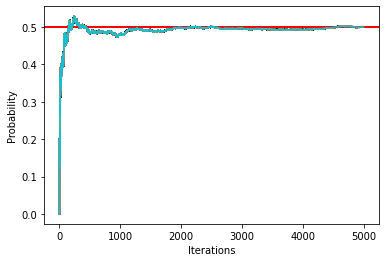

In [ ]:
# 1. Coin Flip Example
#Import required libraries :

import random
import numpy as np
import matplotlib.pyplot as plt

#Coin flip function :

#0 --> Heads
#1 --> Tails

def coin_flip():
    return random.randint(0,1) 

#Monte Carlo Simulation :

#Empty list to store the probability values.
list1 = []

def monte_carlo(n):
    results = 0
    for i in range(n):
        flip_result = coin_flip()
        results = results + flip_result
        
        #Calculating probability value :
        prob_value = results/(i+1)
        
        #Append the probability values to the list :
        list1.append(prob_value)

        #Plot the results :
        plt.axhline(y=0.5, color='r', linestyle='-')
        plt.xlabel("Iterations")
        plt.ylabel("Probability")
        plt.plot(list1)
       
    return results/n
  
#Calling the function :

answer = monte_carlo(5000)
print("Final value :",answer)

In [ ]:
# 2. Estimating PI using Circle and Square
# Run the following code in local machine to visualize the animation and get the output.
# Import required libraries :
import turtle
import random
import matplotlib.pyplot as plt
import math 

#To visualize the random points :
myPen = turtle.Turtle()
myPen.hideturtle()
myPen.speed(0)

#Drawing a square :
myPen.up()
myPen.setposition(-100,-100)
myPen.down()
myPen.fd(200)
myPen.left(90)
myPen.fd(200)

myPen.left(90)
myPen.fd(200)
myPen.left(90)
myPen.fd(200)
myPen.left(90)

#Drawing a circle :
myPen.up()
myPen.setposition(0,-100)
myPen.down()
myPen.circle(100)

#To count the points inside and outside the circle :
in_circle = 0
out_circle = 0

#To store the values of PI :
pi_values = []

#Running for 5 times :
for i in range(5):
    for j in range(1000):

        #Generate random numbers :
        x=random.randrange(-100,100)
        y=random.randrange(-100,100)

        #Check if the number lies outside the circle :
        if (x**2+y**2>100**2):
            myPen.color("black")
            myPen.up()
            myPen.goto(x,y)
            myPen.down()
            myPen.dot()
            out_circle = out_circle+1

        else:
            myPen.color("red")
            myPen.up()
            myPen.goto(x,y)
            myPen.down()
            myPen.dot()
            in_circle = in_circle+1

        #Calculating the value of PI :
        pi = 4.0 * in_circle / (in_circle + out_circle)

        #Append the values of PI in list :
        pi_values.append(pi)
        
        #Calculating the errors :
        avg_pi_errors = [abs(math.pi - pi) for pi in pi_values]
    
    #Print the final value of PI for each iterations :
    print (pi_values[-1])

#Plot the PI values :
plt.axhline(y=math.pi, color='g', linestyle='-')
plt.plot(pi_values)
plt.xlabel("Iterations")
plt.ylabel("Value of PI")
plt.show()

#Plot the error in calculation :
plt.axhline(y=0.0, color='g', linestyle='-')
plt.plot(avg_pi_errors)
plt.xlabel("Iterations")
plt.ylabel("Error")
plt.show()

Winning probability if you always switch: 0.655
Winning probability if you always stick to your original choice: 0.345


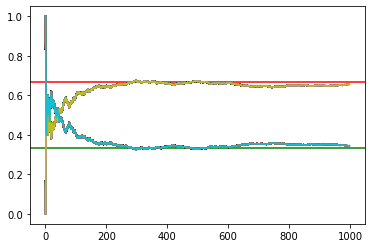

In [ ]:
# 3. Monty Hall Problem
#Import required libraries :
import random
import matplotlib.pyplot as plt

#We are going with 3 doors :
#1 - Car
#2 - Goats
doors = ["goat","goat","car"]

#Empty lists to store probability values :
switch_win_probability = []
stick_win_probability = []

plt.axhline(y=0.66666, color='r', linestyle='-')
plt.axhline(y=0.33333, color='g', linestyle='-')

#Monte_Carlo Simulation :
def monte_carlo(n):
    
    #Calculating switch and stick wins :
    switch_wins = 0
    stick_wins = 0
    
    for i in range(n):
    
        #Randomly placing the car and goats behind the three doors :
        random.shuffle(doors) 
        
        #Contestant's choice :
        k = random.randrange(2)  

        #If the contestant doesn't get car :
        if doors[k] != 'car': 
            switch_wins += 1
            
        #If the contestant got car :
        else: 
            stick_wins += 1

        #Updating the list values :
        switch_win_probability.append(switch_wins/(i+1))
        stick_win_probability.append(stick_wins/(i+1))
        
        #Plotting the data :
        plt.plot(switch_win_probability)
        plt.plot(stick_win_probability)
        
    #Print the probability values :
    print('Winning probability if you always switch:',switch_win_probability[-1])
    print('Winning probability if you always stick to your original choice:', stick_win_probability[-1])


#Calling the function :
monte_carlo(1000)

3.148317224443535


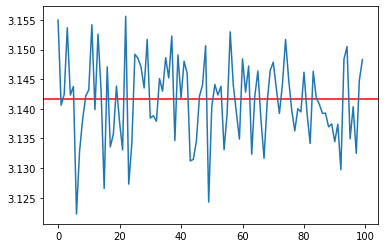

In [ ]:
# Buffon's Needle Problem
# Import required libraries :
import random
import math
import matplotlib.pyplot as plt

#Main function to estimate PI value :
def monte_carlo(runs,needles,n_length,b_width):
    #Empty list to store pi values :
    pi_values = []
    
    #Horizontal line for actual value of PI :
    plt.axhline(y=math.pi, color='r', linestyle='-')
    
    #For all runs :
    for i in range(runs):
        #Initialize number of hits as 0.
        nhits = 0
        
        #For all needles :
        for j in range(needles):
            #We will find the distance from the nearest vertical line :
            #Min = 0     Max = b_width/2
            x = random.uniform(0,b_width/2.0)
            
            #The theta value will be from 0 to pi/2 :
            theta = random.uniform(0,math.pi/2)
            
            #Checking if the needle crosses the line or not :
            xtip  = x - (n_length/2.0)*math.cos(theta)  
            if xtip < 0 :
                nhits += 1
                
        #Going with the formula :
        numerator = 2.0 * n_length * needles
        denominator = b_width * nhits
       
        #Append the final value of pi :
        pi_values.append((numerator/denominator))
    
    #Final pi value after all iterations :
    print(pi_values[-1])
    
    #Plotting the graph :
    plt.plot(pi_values)    
        
#Total number of runs :
runs = 100

#Total number of needles :
needles = 100000

#Length of needle :
n_length = 2  

#space between 2 verical lines :
b_width =2

#Calling the main function :
monte_carlo(runs,needles,n_length,b_width)

In [ ]:
# Why Does the House Always Win?
#Import required libraries :

import random
import matplotlib.pyplot as plt

Rules:
1. There are chips containing numbers ranging from 1–100 in a bag.
2. Users can bet on even or odd chips.
3. In this game, 10 and 11 are special numbers. If we bet on evens, then 10 will be counted as an odd number, and if we bet on odds, then 11 will be counted as an even number.
4. If we bet on even numbers and we get 10 then we lose.
5. If we bet on odd numbers and we get 11 then we lose.

In [ ]:
#Place your bet:

#User can choose even or odd number :
choice = input("Do you want to bet on Even number or Odd number \n")

#For even :
if choice=="Even":
    def pickNote():
        #Get random number between 1-100.
        note = random.randint(1,100)
       
        #Check for our game conditions.
        
        #Notice that 10 isn't considered as even number.
        if note%2!=0 or note==10:
            return False
        elif note%2==0:
            return True

#For odd :        
elif choice=="Odd":
    def pickNote():
        #Get random number between 1-100.
        note = random.randint(1,100)
        
        #Check for our game conditions.
        
        #Notice that 11 isn't considered as odd number.
        if note%2==0 or note==11:
            return False
        elif note%2==1:
            return True  

Do you want to bet on Even number or Odd number 
Even


In [ ]:
#Main function :
def play(total_money, bet_money, total_plays):

    num_of_plays = []
    money = []
    
    #Start with play number 1
    play = 1
  
    for play in range(total_plays):
        #Win :
        if pickNote():
            #Add the money to our funds
            total_money = total_money + bet_money
            #Append the play number
            num_of_plays.append(play)
            #Append the new fund amount
            money.append(total_money)
        
        #Lose :
        else:
            #Add the money to our funds
            total_money = total_money - bet_money 
            #Append the play number
            num_of_plays.append(play)
            #Append the new fund amount
            money.append(total_money)
    
    #Plot the data :
    plt.ylabel('Player Money in $')
    plt.xlabel('Number of bets')
    plt.plot(num_of_plays,money)

    #Final value after all the iterations :
    final_funds.append(money[-1])
    return(final_funds)

[10400, 9600, 8400, 10600, 10400, 10600, 8800, 10400, 9600, 9400]
98200
The player started with $10,000
The player left with $ 9820.0


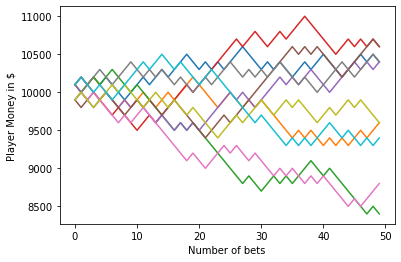

In [ ]:
#Create a list for calculating final funds
final_funds= []

#Run 10 iterations :
for i in range(10):
    ending_fund = play(10000,100,50)
    
print(ending_fund)
print(sum(ending_fund))

#Print the money the player ends with
print("The player started with $10,000")
print("The player left with $",str(sum(ending_fund)/len(ending_fund)))

The player started with $10,000
The player left with $ 9919.8


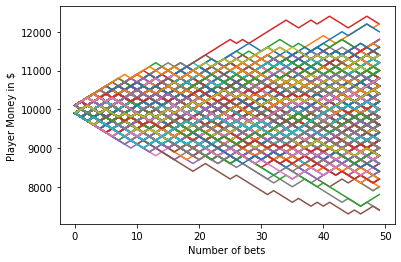

In [ ]:
#Create a list for calculating final funds
final_funds= []

#Run 1000 iterations :
for i in range(1000):
    ending_fund = play(10000,100,50)

#Print the money the player ends with
print("The player started with $10,000")
print("The player left with $",str(sum(ending_fund)/len(ending_fund)))

Number of bets = 5
The player started with $10,000
The player left with $ 9960.0


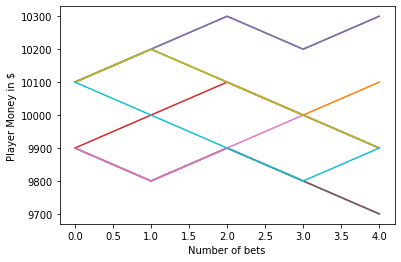

In [ ]:
#Create a list for calculating final funds
final_funds= []

#Run 10 iterations :
for i in range(10):
    ending_fund = play(10000,100,5)

#Print the money the player ends with
print("Number of bets = 5")
print("The player started with $10,000")
print("The player left with $",str(sum(ending_fund)/len(ending_fund)))

Number of bets = 100
The player started with $10,000
The player left with $ 9820.0


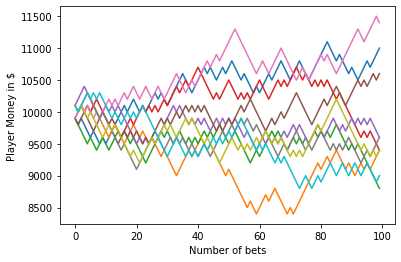

In [ ]:
#Create a list for calculating final funds
final_funds= []

#Run 10 iterations :
for i in range(10):
    ending_fund = play(10000,100,100)

#Print the money the player ends with
print("Number of bets = 100")
print("The player started with $10,000")
print("The player left with $",str(sum(ending_fund)/len(ending_fund)))

Number of bets = 1000
The player started with $10,000
The player left with $ 7380.0


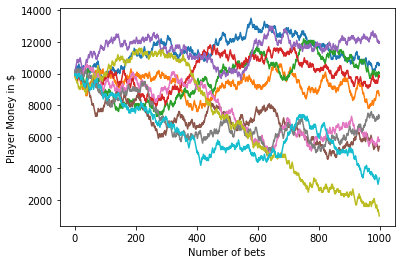

In [ ]:
#Create a list for calculating final funds
final_funds= []

#Run 10 iterations :
for i in range(10):
    ending_fund = play(10000,100,1000)

#Print the money the player ends with
print("Number of bets = 1000")
print("The player started with $10,000")
print("The player left with $",str(sum(ending_fund)/len(ending_fund)))

Number of bets = 5000
The player started with $10,000
The player left with $ -2060.0


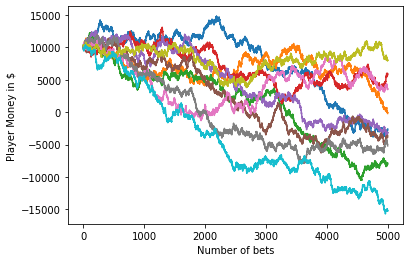

In [ ]:
#Create a list for calculating final funds
final_funds= []

#Run 10 iterations :
for i in range(10):
    ending_fund = play(10000,100,5000)

#Print the money the player ends with
print("Number of bets = 5000")
print("The player started with $10,000")
print("The player left with $",str(sum(ending_fund)/len(ending_fund)))

Number of bets = 10000
The player started with $10,000
The player left with $ -12740.0


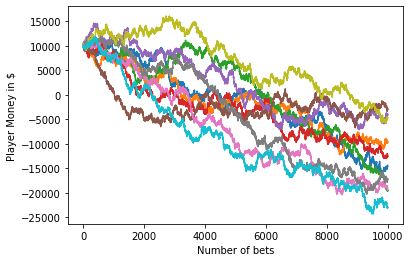

In [ ]:
#Create a list for calculating final funds
final_funds= []

#Run 10 iterations :
for i in range(10):
    ending_fund = play(10000,100,10000)

#Print the money the player ends with
print("Number of bets = 10000")
print("The player started with $10,000")
print("The player left with $",str(sum(ending_fund)/len(ending_fund)))